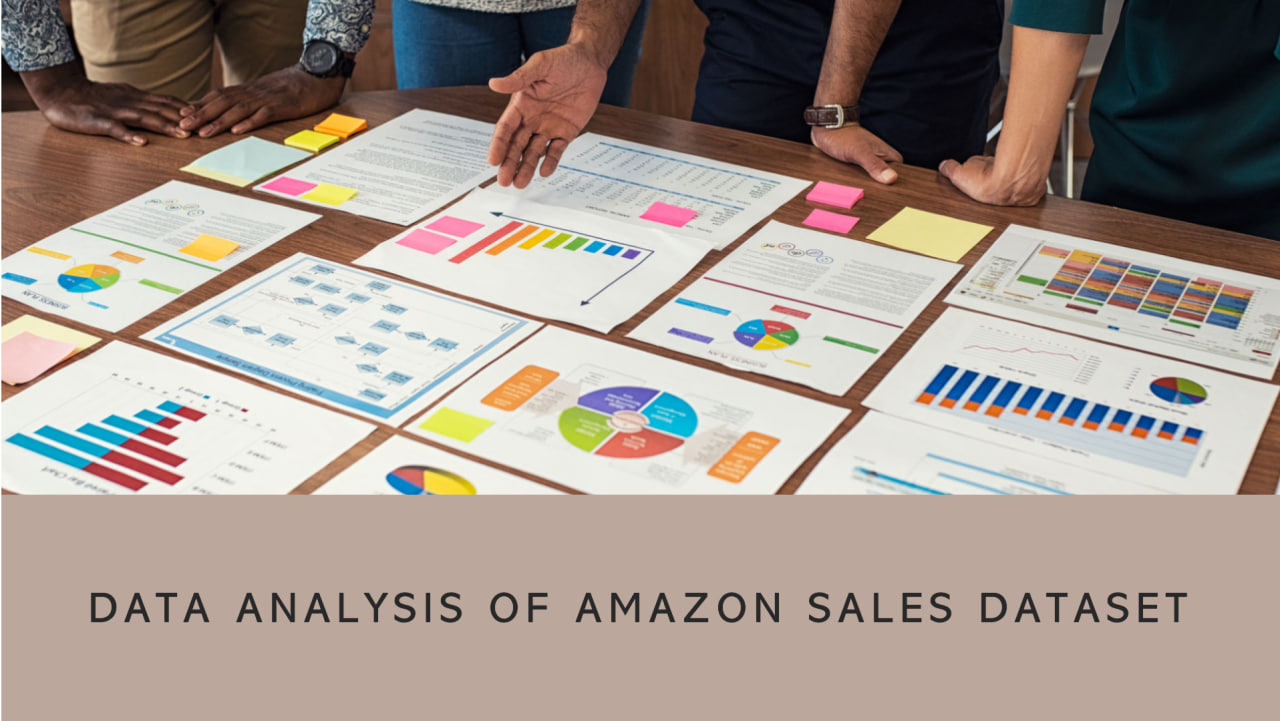

This notebook is about my analysis of the [Amazon Sales Dataset](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset/code). Proper understanding, cleaning and analysis of the data is the main focus of this notebook.

# <span style="color: #6096B4; font-weight: Bold;">About dataset</span>

This dataset has the data of more than 1000 Amazon items with their names, categories, prices, ratings, and reviews, as listed on the official [Amazon website](https://www.amazon.com/).

**Features**

- **product_id** - Product ID
- **product_name** - Name of the Product
- **category** - Category of the Product
- **discounted_price** - Discounted Price of the Product
- **actual_price** - Actual Price of the Product
- **discount_percentage** - Percentage of Discount for the Product
- **rating** - Rating of the Product
- **rating_count** - Number of people who voted for the Amazon rating
- **about_product** - Description about the Product
- **user_id** - ID of the user who wrote review for the Product
- **user_name** - Name of the user who wrote review for the Product
- **review_id** - ID of the user review
- **review_title** - Short review
- **review_content** - Long review
- **img_link** - Image Link of the Product
- **product_link** - Official Website Link of the Product

# <span style="color: #6096B4; font-weight: Bold;">Importing libraries and data</span>

First of all, I imported the necessary libraries, set some defaultes for the data visualization, and defined the csv file containing the data set as a dataframe.

In [1]:
{
    "tags": [
        "hide-input",
    ]
}
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the default style for plots
sns.set_palette("pastel")
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

# Read the dataset into a Pandas DataFrame
df = pd.read_csv('amazon.csv')

# Display the first 10 rows of DataFrame
df.head(10)

# Mute warnings
warnings.filterwarnings('ignore')

/tmp/ipykernel_19590/1466599388.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


As you can see, the data needs some preparation. The category column has all category levels in one cell, without any spaces. The price and percentage columns are signed next to the numbers.

# <span style="color: #6096B4; font-weight: Bold;">Data cleansing and integration</span>

Let's take a look at the dataframe information and column types before we clean up and integrate the data.

In [2]:
{
    "tags": [
        "hide-input",
    ]
}
# Display DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

These details indicate that the dataset contains 1465 rows and 16 columns. All columns have an object type. For better analysis of numeric columns, their type should be edited. All of the cells have complete values, except for the "rating_count" column, which has two null values.

As I understand it, there are two main categories of data: The first is quantitative data about products and prices, and the second is qualitative or content data about users and the reviews they've written about products.

Since the purpose of this notebook is to analyze the first batch of data. I've chosen the first 8 columns to continue. Data from the second category can be used to design a recommender system or sentiment analysis.

In [3]:
{
    "tags": [
        "hide-input",
    ]
}
# Split first 8 rows to detect and drop duplicated values
df = df.loc[:,'product_id':'rating_count']

# Drop duplicate rows
df = df.drop_duplicates()

# Drop rows with missing values
df = df.dropna()

# Create new dataframe to save cleaned data
data = pd.DataFrame()

# Split the "category" column into three columns: "Main Category", "Sub Category", and "Specific Category"
data['Main Category'] = df['category'].astype(str).str.split('|').str[0]
data['Sub Category'] = df['category'].astype(str).str.split('|').str[1]
data['Specific Category'] = df['category'].astype(str).str.split('|').str[-1]

# Convert the "actual_price" column to a float and remove the sign
data['Actual Price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Convert the "discounted_price" column to a float and remove the sign
data['Discounted Price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Convert the "discount_percentage" column to a float and remove the sign
data['Discount Percent'] = df['discount_percentage'].str.replace('%', '').astype(float)

# Convert the "rating" column to a float and replace wrong values
data['Rating'] = df['rating'].str.replace('|', '0').astype(float)

# Convert the "rating_count" column to an int
data['Rating Count'] = df['rating_count'].str.replace(',', '').astype(int)

# Replace some of the values in the category columns
data['Main Category'] = data['Main Category'].replace(['Computers&Accessories', 'MusicalInstruments', 'OfficeProducts', 'Home&Kitchen', 'HomeImprovement', 'Toys&Games', 'Car&Motorbike', 'Health&PersonalCare'], ['Computers & Accessories', 'Musical Instruments', 'Office Products', 'Home & Kitchen', 'Home Improvement', 'Toys & Games', 'Car & Motorbike', 'Health & PersonalCare'])
data['Sub Category'] = data['Sub Category'].replace(['Accessories&Peripherals', 'NetworkingDevices', 'HomeTheater,TV&Video', 'HomeAudio', 'WearableTechnology', 'Mobiles&Accessories', 'Headphones,Earbuds&Accessories', 'ExternalDevices&DataStorage', 'GeneralPurposeBatteries&BatteryChargers', 'OfficePaperProducts', 'CraftMaterials', 'Cameras&Photography', 'OfficeElectronics', 'Printers,Inks&Accessories', 'Arts&Crafts', 'PowerAccessories', 'Kitchen&HomeAppliances', 'Heating,Cooling&AirQuality', 'Kitchen&Dining', 'HomeStorage&Organization', 'CarAccessories', 'HomeMedicalSupplies&Equipment'], ['Accessories & Peripherals', 'Networking Devices', 'Home Theater, TV & Video', 'Home Audio', 'Wearable Technology', 'Mobiles & Accessories', 'Headphones, Earbuds & Accessories', 'External Devices & DataStorage', 'General Purpose Batteries & Battery Chargers', 'Office Paper Products', 'Craft Materials', 'Cameras & Photography', 'Office Electronics', 'Printers, Inks & Accessories', 'Arts & Crafts', 'Power Accessories', 'Kitchen & Home Appliances', 'Heating, Cooling & Air Quality', 'Kitchen & Dining', 'Home Storage & Organization', 'Car Accessories', 'Home Medical Supplies & Equipment'])
data['Specific Category'] = data['Specific Category'].replace(['USBCables', 'SmartWatches', 'SmartTelevisions', 'RemoteControls', 'MixerGrinders', 'MixerGrinders ', 'DryIrons', 'InstantWaterHeaters ', 'HDMICables', 'LintShavers', 'FanHeaters', 'ElectricHeaters', 'ElectricKettles', 'HandBlenders', 'WallChargers', 'WirelessUSBAdapters', 'Kettle&ToasterSets', 'LaundryBaskets', 'JuicerMixerGrinders', 'SteamIrons', 'StorageWaterHeaters', 'WaterFilters&Purifiers', 'ScreenProtectors', 'PowerBanks ', 'EggBoilers', 'SandwichMakers', 'CeilingFans', 'WaterPurifierAccessories', 'GraphicTablets'], ['USB Cables', 'Smart Watches', 'Smart Televisions', 'Remote Controls', 'Mixer Grinders', 'Mixer Grinders ', 'Dry Irons', 'Instant Water Heaters ', 'HDMI Cables', 'Lint Shavers', 'Fan Heaters', 'Electric Heaters', 'Electric Kettles', 'Hand Blenders', 'Wall Chargers', 'Wireless USB Adapters', 'Kettle & ToasterSets', 'Laundry Baskets', 'Juicer Mixer Grinders', 'Steam Irons', 'Storage Water Heaters', 'Water Filters & Purifiers', 'Screen Protectors', 'Power Banks ', 'Egg Boilers', 'Sandwich Makers', 'Ceiling Fans', 'Water Purifier Accessories', 'Graphic Tablets'])

# Display the first 10 rows of data
data.head(10)

,Main Category,Sub Category,Specific Category,Actual Price,Discounted Price,Discount Percent,Rating,Rating Count
0,Computers & Accessories,Accessories & Peripherals,USB Cables,1099.0,399.00,64.0,4.2,24269
1,Computers & Accessories,Accessories & Peripherals,USB Cables,349.0,199.00,43.0,4.0,43994
2,Computers & Accessories,Accessories & Peripherals,USB Cables,1899.0,199.00,90.0,3.9,7928
3,Computers & Accessories,Accessories & Peripherals,USB Cables,699.0,329.00,53.0,4.2,94363
4,Computers & Accessories,Accessories & Peripherals,USB Cables,399.0,154.00,61.0,4.2,16905
5,Computers & Accessories,Accessories & Peripherals,USB Cables,1000.0,149.00,85.0,3.9,24871
6,Computers & Accessories,Accessories & Peripherals,USB Cables,499.0,176.63,65.0,4.1,15188
7,Computers & Accessories,Accessories & Peripherals,USB Cables,299.0,229.00,23.0,4.3,30411
8,Computers & Accessories,Networking Devices,Wireless USB Adapters,999.0,499.00,50.0,4.2,179691
9,Computers & Accessories,Accessories & Peripherals,USB Cables,299.0,199.00,33.0,4.0,43994


I created a new dataframe based on the first eight columns to store the processed data for analysis and visualization. I did the following to prepare the data:

- Removed duplicate rows in those columns
- Removed rows with nan values
- Split the category column into three columns
- Removed signs and numbered some columns
- Renamed the category column values to improve readability

# <span style="color: #6096B4; font-weight: Bold;">Data analysis and visualization</span>

Now we have a clean dataframe with category, price, discount, and rating information. Next, we will look at the relationship between price, discount, and rating, as well as the variety of products in each category.

## <span style="color: #6096B4; font-weight: Bold;">Which categories have the most products?</span>

At the top level of the category, "**Main Category**", I had a look at the number of products.

Text(0.5, 1.0, 'Top Main Categories')

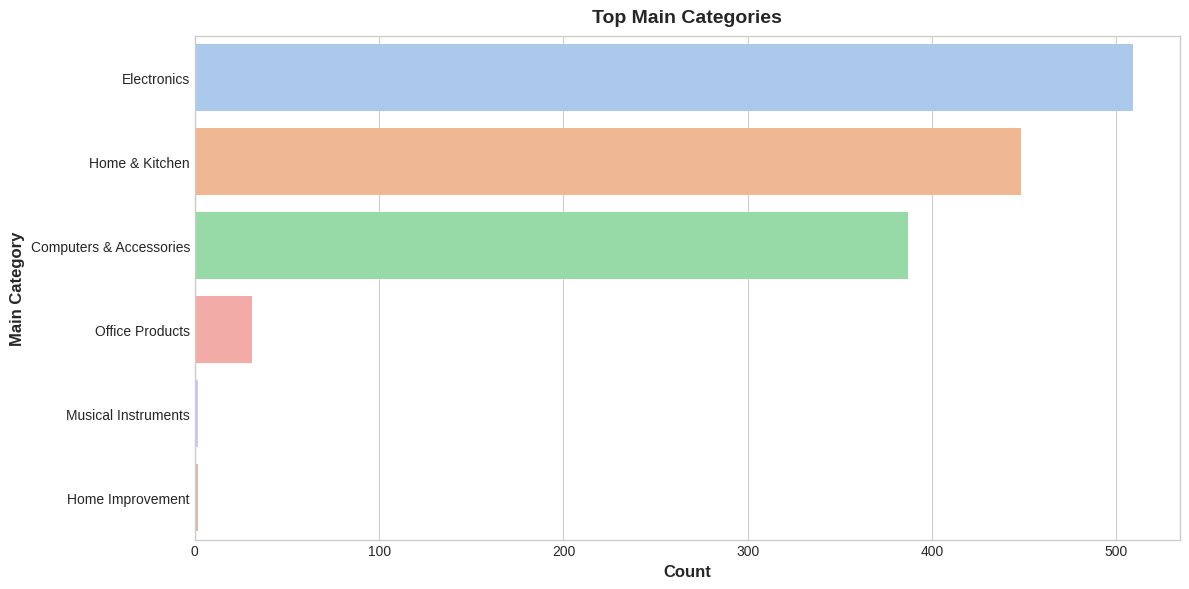

In [4]:
{
    "tags": [
        "hide-input",
    ]
}
# Visualization 1: Bar Chart - Count of products in each main category
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Main Category', order=data['Main Category'].value_counts().index[:6])
plt.xlabel('Count')
plt.ylabel('Main Category')
plt.title('Top Main Categories')

"**Electronics**", "**Home & Kitchen**" and "**Computers & Accessories**" have the largest number of products. More than 90% of products are in these categories. The following table shows the number of products in each category.

In [5]:
{
    "tags": [
        "hide-input",
    ]
}
# Calculate average values and count of products in each main category
main_cat_count = data.groupby(['Main Category']).agg({'Actual Price': 'mean',
                                                           'Discounted Price': 'mean',
                                                           'Rating': 'mean',
                                                           'Main Category': 'size'}).round(2)

# Rename the 'Main Category' column to 'Count'
main_cat_count = main_cat_count.rename(columns={'Main Category': 'Count'})

# Sort the results based on the count in descending order
main_cat_count = main_cat_count.sort_values('Count', ascending=False)

# Display the DataFrame
main_cat_count

,Actual Price,Discounted Price,Rating,Count
Main Category,,,,
Electronics,10290.76,6079.48,4.08,509
Home & Kitchen,4162.07,2330.62,4.03,448
Computers & Accessories,1821.08,924.87,4.15,387
Office Products,397.19,301.58,4.31,31
Home Improvement,799.00,337.00,4.25,2
Musical Instruments,1347.00,638.00,3.90,2
Car & Motorbike,4000.00,2339.00,3.80,1
Health & PersonalCare,1900.00,899.00,4.00,1
Toys & Games,150.00,150.00,4.30,1


In this dataset, products are categorized in several levels from general to specific. Since the number of these levels was variable, I did not categorize in more detail and checked the highest level from the middle categories with the title of "**Sub Category**".

Text(0.5, 1.0, 'Top 10 Sub Categories')

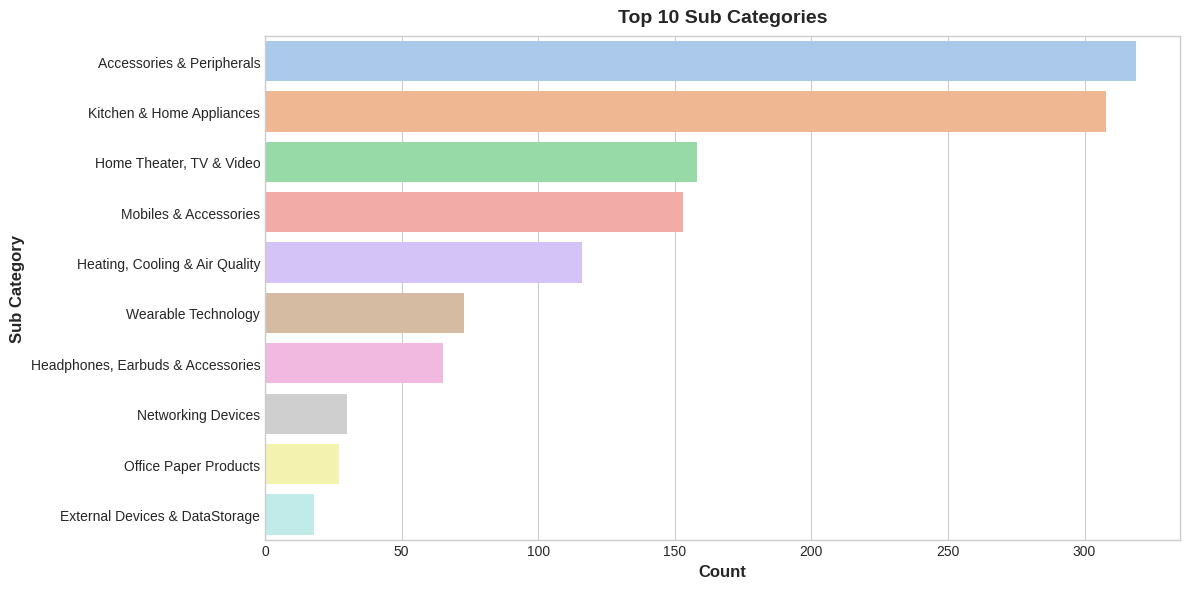

In [6]:
{
    "tags": [
        "hide-input",
    ]
}
# Visualization 2: Bar Chart - Count of products in each sub category
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Sub Category', order=data['Sub Category'].value_counts().index[:10])
plt.xlabel('Count')
plt.ylabel('Sub Category')
plt.title('Top 10 Sub Categories')

In the chart above, you can see the 10 subcategories with the most products. In the table below, you can see the number of products in each subcategory and their average price and rating.

In [7]:
{
    "tags": [
        "hide-input",
    ]
}
# Calculate average values and count of products in each sub category
sub_cat_count = data.groupby(['Sub Category']).agg({'Actual Price': 'mean',
                                                           'Discounted Price': 'mean',
                                                           'Rating': 'mean',
                                                           'Sub Category': 'size'}).round(2)

# Rename the 'Sub Category' column to 'Count'
sub_cat_count = sub_cat_count.rename(columns={'Sub Category': 'Count'})

# Sort the results based on the count in descending order
sub_cat_count = sub_cat_count.sort_values('Count', ascending=False)

# Display the DataFrame
sub_cat_count

,Actual Price,Discounted Price,Rating,Count
Sub Category,,,,
Accessories & Peripherals,1174.10,515.29,4.14,319
Kitchen & Home Appliances,3786.03,2153.08,4.04,308
"Home Theater, TV & Video",17380.34,10496.81,4.07,158
Mobiles & Accessories,10112.31,7446.56,4.12,153
"Heating, Cooling & Air Quality",5908.98,3222.32,3.99,116
Wearable Technology,8673.62,2348.23,4.02,73
"Headphones, Earbuds & Accessories",2847.25,960.86,3.93,65
Networking Devices,2240.83,1157.13,4.16,30
Office Paper Products,351.59,242.85,4.29,27


Each category ended with a subcategory, which I placed in the "**Specific Category**" column. Now let's see which categories contain the most products

Text(0.5, 1.0, 'Top 10 Specific Categories')

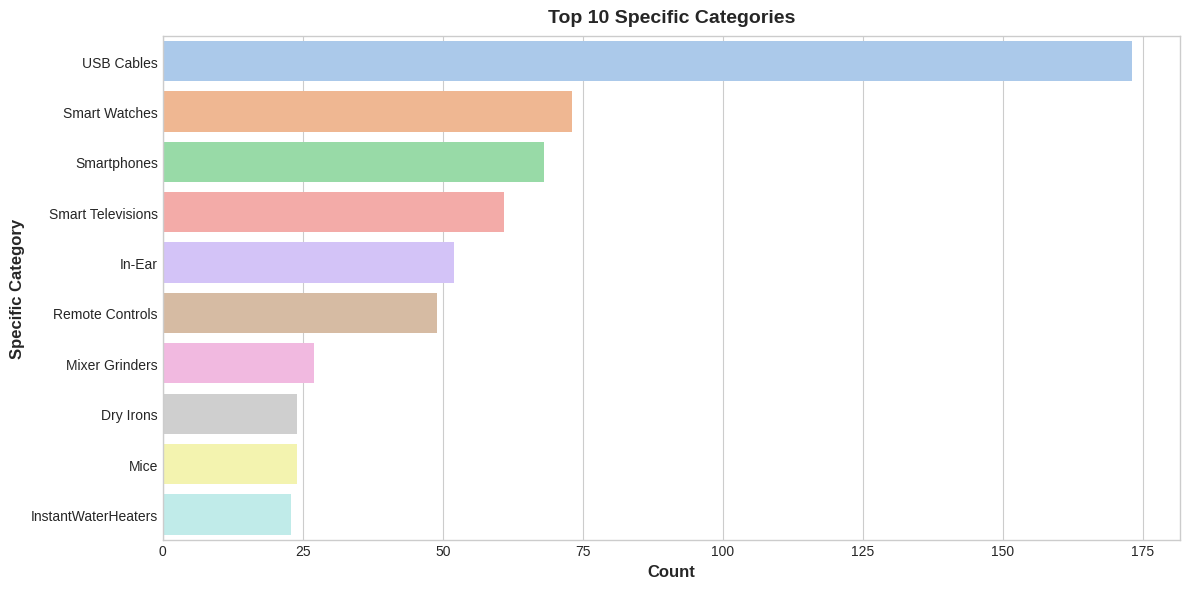

In [8]:
{
    "tags": [
        "hide-input",
    ]
}
# Visualization 1: Bar Chart - Count of products in each specific category
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Specific Category', order=data['Specific Category'].value_counts().index[:10])
plt.xlabel('Count')
plt.ylabel('Specific Category')
plt.title('Top 10 Specific Categories')

"**USB Cables**" were by far the most popular product category. See the table below for more details on the top product categories.

In [9]:
{
    "tags": [
        "hide-input",
    ]
}
# Calculate average values and count of products in each specific category
specific_cat_count = data.groupby(['Specific Category']).agg({'Actual Price': 'mean',
                                                           'Discounted Price': 'mean',
                                                           'Rating': 'mean',
                                                           'Specific Category': 'size'}).round(2)

# Rename the 'Specific Category' column to 'Count'
specific_cat_count = specific_cat_count.rename(columns={'Specific Category': 'Count'})

# Sort the results based on the count in descending order
specific_cat_count = specific_cat_count.sort_values('Count', ascending=False)

# Display the DataFrame
specific_cat_count.head(50)

,Actual Price,Discounted Price,Rating,Count
Specific Category,,,,
USB Cables,925.63,366.91,4.14,173
Smart Watches,8673.62,2348.23,4.02,73
Smartphones,20593.40,15754.44,4.10,68
Smart Televisions,40712.77,25212.33,4.21,61
In-Ear,2960.08,976.17,3.90,52
Remote Controls,1170.45,438.94,3.80,49
Mixer Grinders,5289.59,3004.72,4.01,27
Mice,1055.79,609.33,4.29,24
Dry Irons,1179.50,762.17,4.13,24
